This project aims to leverage toy examples to illustrate how to build linear model, deep neural networks, convolutional nueral networds as well as recurrent neural networks by [Tensorflow](www.tensorflow.org). The dataset is famous handwritten digits dataset, namely [MNIST](http://yann.lecun.com/exdb/mnist/).

In [1]:
#Import required packages
import tensorflow as tf
import numpy as np
#Load MNIST dataset
import tensorflow.examples.tutorials.mnist.input_data as input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


## Linear Model

Here's an simple linear model to do classification on MNIST.

In [3]:
#Create a linear graph, define its architecture in terms of nodes and compuatations
graph_linear = tf.Graph()
with graph_linear.as_default():
    #Define input placeholder and target placeholder
    x = tf.placeholder(tf.float32, [None, 784], name='x_placeholder')
    y_ = tf.placeholder(tf.float32, [None,10], name='y_placeholder')
    #Define a linear model structure
    def linearModel(x):
        #Create weights and biases
        W = tf.Variable(tf.zeros([784,10]), name='weights')
        b = tf.Variable(tf.zeros([10]), name='biases')
        #Softmax output 
        y = tf.nn.softmax(tf.matmul(x,W) + b)
        return y
    y = linearModel(x)
    #Cross entropy as the loss
    cross_entropy = -tf.reduce_sum(y_*tf.log(y))
    #Use gradient descent method to optmize
    train_step = tf.train.GradientDescentOptimizer(0.01).minimize(cross_entropy)
    correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

In [5]:
num_steps = 5001
batch_size = 64
#Create a session, in order to run the graph
with tf.Session(graph=graph_linear) as sess:
    #Initialize all the variables created above
    init_op = tf.global_variables_initializer()
    sess.run(init_op)
    for step in range(num_steps):
        offset = (step * batch_size) % (mnist.train.labels.shape[0] - batch_size)
        #Feed the dataset to the placeholders      
        batch_data = mnist.train.images[offset:(offset + batch_size), :]
        batch_labels = mnist.train.labels[offset:(offset + batch_size), :]
        #Pass the data to a dictionary
        feed_dict = {x : batch_data, y_ : batch_labels}
        #Train the model by feeding batch data
        _, loss = sess.run([train_step, cross_entropy], feed_dict=feed_dict)
        #Calculate acccuracy after 500 times training
        if step%500 == 0:
            result = sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels})
            print("Test Accuracy：", result)

Test Accuracy： 0.3045
Test Accuracy： 0.9028
Test Accuracy： 0.8992
Test Accuracy： 0.9103
Test Accuracy： 0.9211
Test Accuracy： 0.9175
Test Accuracy： 0.9187
Test Accuracy： 0.9185
Test Accuracy： 0.9005
Test Accuracy： 0.9195
Test Accuracy： 0.919


## Fully Connected Model

This example uses several fully connected neural network layers to train the classification.

In [8]:
#Created a fully connected graph
graph_fully = tf.Graph()
with graph_fully.as_default() as g:
    #Define input placeholders
    x = tf.placeholder(tf.float32, [None, 784])
    y_ = tf.placeholder(tf.float32, [None,10])
    num_class = y.shape[1].value
    num_pixel = x.shape[1].value
    #Define the architecture of neural networks
    def multiHiddenLayer(x, layers):
        num_layer = len(layers)
        pre_units = num_pixel#输入节点
        next_units = pre_units#输出节点
        data = x
        #Traverse each layer
        for i in range(num_layer):            
            with g.name_scope('hidden'+str(i)):
                #权重
                next_units = layers[i]
                weights = tf.Variable(
                    tf.truncated_normal([pre_units, next_units],
                                        stddev=1.0 / np.sqrt(float(pre_units))),
                    name='weights')
                #偏差
                biases = tf.Variable(tf.zeros([next_units]), 
                                     name='biases')
                hidden = tf.nn.relu(tf.matmul(data, weights) + biases)
                data = hidden
                pre_units = next_units
        # Linear
        with g.name_scope('softmax_linear'):
            weights = tf.Variable(
                tf.truncated_normal([next_units, num_class],
                                    stddev=1.0 / np.sqrt(float(next_units))),
                name='weights')
            biases = tf.Variable(tf.zeros([num_class]),
                                 name='biases')
            logits = tf.matmul(data, weights) + biases
        return tf.nn.softmax(logits)

In [9]:
with graph_fully.as_default() as g:
    layers = [128, 64]#neurons for each layer
    y = multiHiddenLayer(x, layers)
    #定义目标函数，采用交叉熵
    cross_entropy = -tf.reduce_sum(y_*tf.log(y))
    #定义训练方式，梯度下降法
    train_step = tf.train.GradientDescentOptimizer(0.01).minimize(cross_entropy)
    #定义模型评价指标精确度
    correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

In [11]:
num_steps = 5001
batch_size = 64
#Create a session
with tf.Session(graph=graph_fully) as sess:
    #Initialize all the variables
    init_op = tf.global_variables_initializer()
    sess.run(init_op)
    for step in range(num_steps):
        offset = (step * batch_size) % (mnist.train.labels.shape[0] - batch_size)
        #Feed the placeholder    
        batch_data = mnist.train.images[offset:(offset + batch_size), :]
        batch_labels = mnist.train.labels[offset:(offset + batch_size), :]
        #Pass the data
        feed_dict = {x : batch_data, y_ : batch_labels}
        _, loss = sess.run([train_step, cross_entropy], feed_dict=feed_dict)
        if step%500 == 0:
            result = sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels})
            print("Test Accuracy：", result)

Test Accuracy： 0.1991
Test Accuracy： 0.9385
Test Accuracy： 0.9543
Test Accuracy： 0.9627
Test Accuracy： 0.9682
Test Accuracy： 0.9651
Test Accuracy： 0.9672
Test Accuracy： 0.9651
Test Accuracy： 0.9709
Test Accuracy： 0.9687
Test Accuracy： 0.9654


## Convolutional Neural Network

Following example shows how to create a convolutional neural network. In addition, 'name_scope' is taken into consideration for each layer. Reference:http://wiki.jikexueyuan.com/project/tensorflow-zh/how_tos/variable_scope.html

In [2]:
#Create weights
def weight_variable(shape):
  initial = tf.truncated_normal(shape, stddev=0.1)
  return tf.Variable(initial, name='weights')
#Create biases
def bias_variable(shape):
  initial = tf.constant(0.1, shape=shape)
  return tf.Variable(initial, name='biases')

In [3]:
#Convolutional function
def conv2d(x, W):
  return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')
#Max pool function
def max_pool_2x2(x):
  return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],
                        strides=[1, 2, 2, 1], padding='SAME')

In [7]:
def conv_relu_pool(input, kernel_shape, bias_shape):
    # Create variable named "weights".
    weights = weight_variable(kernel_shape)
    # Create variable named "biases".
    biases = bias_variable(bias_shape)
    conv = conv2d(input, weights)
    relu = tf.nn.relu(conv + biases)
    pool = max_pool_2x2(relu)
    return pool

In [14]:
def cnnLayer(x, keep_prob):
    x_image = tf.reshape(x, [-1,28,28,1])
    #First Conv
    with tf.variable_scope('hidden1'):
        kernel_shape, bias_shape = [5, 5, 1, 32], [32] 
        h_pool1 = conv_relu_pool(x_image, kernel_shape, bias_shape)
        
    #Second Conv
    with tf.variable_scope('hidden2'):
        kernel_shape, bias_shape = [5, 5, 32, 64], [64] 
        h_pool2 = conv_relu_pool(h_pool1, kernel_shape, bias_shape)
    
    #Fully Connected Layer
    with tf.variable_scope('fully_connected'):
        W_fc1 = weight_variable([7 * 7 * 64, 1024])
        b_fc1 = bias_variable([1024])
        h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])
        h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)
        #Dropout, to prevent against overfitting      
        h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)
    #Softmax Layer
    with tf.variable_scope('softmax_layer'):
        W_fc2 = weight_variable([1024, 10])
        b_fc2 = bias_variable([10])
        logits = tf.matmul(h_fc1_drop, W_fc2) + b_fc2
    return tf.nn.softmax(logits)

In [15]:
graph_cnn = tf.Graph()
with graph_cnn.as_default() as g:
    #Create input placeholders
    x = tf.placeholder(tf.float32, [None, 784])
    y_ = tf.placeholder(tf.float32, [None,10])
    #Define ropout probability placholder
    keep_prob = tf.placeholder("float")   

    y = cnnLayer(x, keep_prob)
    #Define cross-entropy as loss function
    cross_entropy = -tf.reduce_sum(y_*tf.log(y))
    #Adam Optimizer
    train_step = tf.train.AdamOptimizer(0.0005).minimize(cross_entropy)
    #Define accuracy
    correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

In [18]:
num_steps = 5001
batch_size = 64
#Create a session
with tf.Session(graph=graph_cnn) as sess:
    #Initialize variables
    init_op = tf.global_variables_initializer()
    sess.run(init_op)
    for step in range(num_steps):
        offset = (step * batch_size) % (mnist.train.labels.shape[0] - batch_size)
        #Feed placeholders      
        batch_data = mnist.train.images[offset:(offset + batch_size), :]
        batch_labels = mnist.train.labels[offset:(offset + batch_size), :]
        feed_dict = {x : batch_data, y_ : batch_labels, keep_prob: 0.5}
        #Train
        _, loss = sess.run([train_step, cross_entropy], feed_dict=feed_dict)
        if step%500 == 0:
            feed_dict = {x : mnist.test.images, y_ : mnist.test.labels, keep_prob: 1}
            result = sess.run(accuracy, feed_dict=feed_dict)
            print("Testing Accuracy：", result)

Testing Accuracy： 0.1185
Testing Accuracy： 0.972
Testing Accuracy： 0.9818
Testing Accuracy： 0.9868
Testing Accuracy： 0.9883
Testing Accuracy： 0.9878
Testing Accuracy： 0.9886
Testing Accuracy： 0.9901
Testing Accuracy： 0.9909
Testing Accuracy： 0.9903
Testing Accuracy： 0.9894


## Recurrent Neural Network

In [2]:
from tensorflow.contrib import rnn
# Network Parameters
n_input = 28 # MNIST data input (img shape: 28*28)
n_steps = 28 # timesteps
n_hidden = 128 # hidden layer num of features
n_classes = 10 # MNIST total classes (0-9 digits)
learning_rate = 0.001

In [3]:
graph_rnn = tf.Graph()
with graph_rnn.as_default():
    # tf Graph input
    x = tf.placeholder(tf.float32, [None, n_steps, n_input])
    y_ = tf.placeholder(tf.float32, [None, n_classes])
    def rnnLayer(x):
        # 矩阵变换，
        x = tf.transpose(x, [1, 0, 2])
        # (n_steps*batch_size, n_input)
        x = tf.reshape(x, [-1, n_input])
        # 按照步长拆分 (batch_size, n_input)
        x = tf.split(x, n_steps, 0)
        with tf.variable_scope("rnn_lstm"):
            # 输出连接层权重
            weights = tf.Variable(tf.random_normal([n_hidden, n_classes]), name='weights')
            biases = tf.Variable(tf.random_normal([n_classes]), name='biases')
            # Define a lstm cell with tensorflow
            lstm_cell = rnn.BasicLSTMCell(n_hidden, forget_bias=1.0)
            with tf.variable_scope('rnn_layer'):
                # Get lstm cell output
                outputs, states = rnn.static_rnn(lstm_cell, x, dtype=tf.float32)
            # Linear activation, using rnn inner loop last output
        logits = tf.matmul(outputs[-1], weights) + biases
        return tf.nn.softmax(logits)

    y = rnnLayer(x)

    # Define loss and optimizer
    cross_entropy = -tf.reduce_mean(y_* tf.log(y))
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cross_entropy)

    # Evaluate model
    correct_pred = tf.equal(tf.argmax(y_,1), tf.argmax(y,1))
    accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))



In [5]:
# Parameters
num_steps = 5001
batch_size = 128
display_step = 100
# Launch the graph
with tf.Session(graph=graph_rnn) as sess:
    # Initializing the variables
    init = tf.global_variables_initializer()
    sess.run(init)
    # Keep training until reach max iterations
    for step in np.arange(num_steps):
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        # Reshape data to get 28 seq of 28 elements
        batch_x = batch_x.reshape((batch_size, n_steps, n_input))
        # Run optimization op (backprop)
        sess.run(optimizer, feed_dict={x: batch_x, y_: batch_y})
        if step % display_step == 0:
            # Calculate batch accuracy
            acc = sess.run(accuracy, feed_dict={x: batch_x, y_: batch_y})

            print("Iter " + str(step*batch_size) + ", Training Accuracy= " + \
                  "{:.5f}".format(acc))

    print("Optimization Finished!")

    # Calculate accuracy for 128 mnist test images
    test_data = mnist.test.images.reshape((-1, n_steps, n_input))
    test_label = mnist.test.labels
    print("Testing Accuracy:", \
        sess.run(accuracy, feed_dict={x: test_data, y_: test_label}))

Iter 0, Training Accuracy= 0.08594
Iter 12800, Training Accuracy= 0.81250
Iter 25600, Training Accuracy= 0.86719
Iter 38400, Training Accuracy= 0.93750
Iter 51200, Training Accuracy= 0.92969
Iter 64000, Training Accuracy= 0.96094
Iter 76800, Training Accuracy= 0.97656
Iter 89600, Training Accuracy= 0.96875
Iter 102400, Training Accuracy= 0.96875
Iter 115200, Training Accuracy= 0.99219
Iter 128000, Training Accuracy= 0.97656
Iter 140800, Training Accuracy= 0.97656
Iter 153600, Training Accuracy= 0.99219
Iter 166400, Training Accuracy= 0.98438
Iter 179200, Training Accuracy= 0.98438
Iter 192000, Training Accuracy= 0.98438
Iter 204800, Training Accuracy= 0.99219
Iter 217600, Training Accuracy= 0.99219
Iter 230400, Training Accuracy= 0.98438
Iter 243200, Training Accuracy= 0.99219
Iter 256000, Training Accuracy= 0.98438
Iter 268800, Training Accuracy= 0.96875
Iter 281600, Training Accuracy= 0.97656
Iter 294400, Training Accuracy= 0.99219
Iter 307200, Training Accuracy= 1.00000
Iter 320000,

## Multi-layer Rnn model

In this example, we create a two-layer LSTM neural network with dropout method to prevent against overfitting.

In [16]:
layer_num = 2 #LSTM layer number
graph_multirnn = tf.Graph()
with graph_multirnn.as_default():
    # tf Graph input
    x = tf.placeholder(tf.float32, [None, n_steps, n_input])
    y_ = tf.placeholder(tf.float32, [None, n_classes])
    keep_prob =tf.placeholder(tf.float32)
    def rnnLayer(x):
        # 矩阵变换，
        x = tf.transpose(x, [1, 0, 2])
        # (n_steps*batch_size, n_input)
        x = tf.reshape(x, [-1, n_input])
        # 按照步长拆分 (batch_size, n_input)
        x = tf.split(x, n_steps, 0)
        with tf.variable_scope("rnn_lstm"):
            # 输出连接层权重
            weights = tf.Variable(tf.random_normal([n_hidden, n_classes]), name='weights')
            biases = tf.Variable(tf.random_normal([n_classes]), name='biases')
            # Define a lstm cell with tensorflow
            lstm_cell = rnn.BasicLSTMCell(n_hidden, forget_bias=1.0)
            #Add dropout to prevent against overfitting
            lstm_cell = rnn.DropoutWrapper(cell=lstm_cell, input_keep_prob=1.0, output_keep_prob=keep_prob)
            #Create two layer LSTM network
            mlstm_cell = rnn.MultiRNNCell([lstm_cell] * layer_num, state_is_tuple=True)
            with tf.variable_scope('rnn_layer'):
                # Get lstm cell output, using dynamic rnn, the input is one tensor
                #outputs, states = tf.nn.dynamic_rnn(mlstm_cell, x, dtype=tf.float32)
                #if we use static rnn, we need to unrollthe graphs and the tensor slices
                #x must be a list of tensors
                outputs, states = rnn.static_rnn(mlstm_cell, x, dtype=tf.float32)
            # Linear activation, using rnn inner loop last output
        logits = tf.matmul(outputs[-1], weights) + biases
        return tf.nn.softmax(logits)

    y = rnnLayer(x)

    # Define loss and optimizer
    cross_entropy = -tf.reduce_mean(y_* tf.log(y))
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cross_entropy)

    # Evaluate model
    correct_pred = tf.equal(tf.argmax(y_,1), tf.argmax(y,1))
    accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

In [17]:
# Parameters
num_steps = 5001
batch_size = 128
display_step = 200
# Launch the graph
with tf.Session(graph=graph_multirnn) as sess:
    # Initializing the variables
    init = tf.global_variables_initializer()
    sess.run(init)
    # Keep training until reach max iterations
    for step in np.arange(num_steps):
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        # Reshape data to get 28 seq of 28 elements
        batch_x = batch_x.reshape((batch_size, n_steps, n_input))
        # Run optimization op (backprop)
        sess.run(optimizer, feed_dict={x: batch_x, y_: batch_y, keep_prob: 0.5})
        if step % display_step == 0:
            # Calculate batch accuracy
            acc = sess.run(accuracy, feed_dict={x: batch_x, y_: batch_y, keep_prob:1.0})

            print("Iter " + str(step*batch_size) + ", Training Accuracy= " + \
                  "{:.5f}".format(acc))

    print("Optimization Finished!")

    # Calculate accuracy for 128 mnist test images
    test_data = mnist.test.images.reshape((-1, n_steps, n_input))
    test_label = mnist.test.labels
    print("Testing Accuracy:", \
        sess.run(accuracy, feed_dict={x: test_data, y_: test_label, keep_prob: 1.0}))

Iter 0, Training Accuracy= 0.10938
Iter 25600, Training Accuracy= 0.95312
Iter 51200, Training Accuracy= 0.98438
Iter 76800, Training Accuracy= 0.98438
Iter 102400, Training Accuracy= 0.94531
Iter 128000, Training Accuracy= 0.98438
Iter 153600, Training Accuracy= 0.97656
Iter 179200, Training Accuracy= 0.99219
Iter 204800, Training Accuracy= 0.98438
Iter 230400, Training Accuracy= 0.97656
Iter 256000, Training Accuracy= 0.98438
Iter 281600, Training Accuracy= 1.00000
Iter 307200, Training Accuracy= 0.99219
Iter 332800, Training Accuracy= 0.99219
Iter 358400, Training Accuracy= 0.97656
Iter 384000, Training Accuracy= 0.99219
Iter 409600, Training Accuracy= 1.00000
Iter 435200, Training Accuracy= 0.99219
Iter 460800, Training Accuracy= 0.99219
Iter 486400, Training Accuracy= 0.98438
Iter 512000, Training Accuracy= 0.99219
Iter 537600, Training Accuracy= 1.00000
Iter 563200, Training Accuracy= 1.00000
Iter 588800, Training Accuracy= 0.99219
Iter 614400, Training Accuracy= 1.00000
Iter 640

## Bi-directional Rnn model

This example shows how to apply Bidirectional RNN model to MNIST images, actually it leverages two RNN neetwork, one forward, one backward. Reference: https://github.com/aymericdamien/TensorFlow-Examples/tree/master/notebooks

In [25]:
# Parameters
learning_rate = 0.001
num_steps = 10000
batch_size = 128
display_step = 500

# Network Parameters
n_input = 28 # MNIST data input (img shape: 28*28)
n_steps = 28 # timesteps
n_hidden = 128 # hidden layer num of features
n_classes = 10 # MNIST total classes (0-9 digits)

In [26]:
graph_biRnn = tf.Graph()
with graph_biRnn.as_default():
    # placeholder input
    x = tf.placeholder(tf.float32, [None, n_steps, n_input])
    y = tf.placeholder(tf.float32, [None, n_classes])


    def birnnLayer(x):

        # Prepare data shape to match `bidirectional_rnn` function requirements
        # Current data input shape: (batch_size, n_steps, n_input)
        # Required shape: 'n_steps' tensors list of shape (batch_size, n_input)
    
        # Permuting batch_size and n_steps
        x = tf.transpose(x, [1, 0, 2])
        # Reshape to (n_steps*batch_size, n_input)
        x = tf.reshape(x, [-1, n_input])
        # Split to get a list of 'n_steps' tensors of shape (batch_size, n_input)
        x = tf.split(x, n_steps, 0)
        
        # Define weights
        weights = {
              # Hidden layer weights => 2*n_hidden because of foward + backward cells
              'out': tf.Variable(tf.random_normal([2*n_hidden, n_classes]), name='weights')}
        biases = {
              'out': tf.Variable(tf.random_normal([n_classes]), name='biases')}

        # Define lstm cells with tensorflow
        # Forward direction cell
        with tf.variable_scope('BiRnnLayer'):
            lstm_fw_cell = rnn.BasicLSTMCell(n_hidden, forget_bias=1.0)
            # Backward direction cell
            lstm_bw_cell = rnn.BasicLSTMCell(n_hidden, forget_bias=1.0)
            #   Get lstm cell output
            with tf.variable_scope('BiRnn_Structure'):
                try:
                    outputs, _, _ = rnn.static_bidirectional_rnn(lstm_fw_cell, 
                                                                 lstm_bw_cell, x,
                                                                 dtype=tf.float32)
                except Exception: # Old TensorFlow version only returns outputs not states
                    outputs = rnn.static_bidirectional_rnn(lstm_fw_cell, 
                                                           lstm_bw_cell, x,
                                                           dtype=tf.float32)

        # Linear activation, using rnn inner loop last output
        return tf.add(tf.matmul(outputs[-1], weights['out']), biases['out'])

    pred = birnnLayer(x)

    # Define loss and optimizer
    cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels=y))
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cross_entropy)

    # Evaluate model
    correct_pred = tf.equal(tf.argmax(pred,1), tf.argmax(y,1))
    accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

In [30]:
# Launch the graph
with tf.Session(graph=graph_biRnn) as sess:
    # Initializing the variables
    init = tf.global_variables_initializer()
    sess.run(init)
    # Keep training until reach max iterations
    for step in np.arange(num_steps):
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        # Reshape data to get 28 seq of 28 elements
        batch_x = batch_x.reshape((batch_size, n_steps, n_input))
        # Run optimization op (backprop)
        sess.run(optimizer, feed_dict={x: batch_x, y: batch_y})
        if step % display_step == 0:
            # Calculate batch accuracy
            acc = sess.run(accuracy, feed_dict={x: batch_x, y: batch_y})
            # Calculate batch loss
            loss = sess.run(cross_entropy, feed_dict={x: batch_x, y: batch_y})
            print("Iter " + str(step*batch_size) + ", Minibatch Loss= " + \
                  "{:.6f}".format(loss) + ", Training Accuracy= " + \
                  "{:.5f}".format(acc))

    print("Optimization Finished!")

    # Calculate accuracy for 128 mnist test images
    test_data = mnist.test.images.reshape((-1, n_steps, n_input))
    test_label = mnist.test.labels
    print("Testing Accuracy:", \
        sess.run(accuracy, feed_dict={x: test_data, y: test_label}))

Iter 0, Minibatch Loss= 2.148260, Training Accuracy= 0.31250
Iter 64000, Minibatch Loss= 0.228522, Training Accuracy= 0.92969
Iter 128000, Minibatch Loss= 0.102823, Training Accuracy= 0.96875
Iter 192000, Minibatch Loss= 0.168021, Training Accuracy= 0.96094
Iter 256000, Minibatch Loss= 0.085315, Training Accuracy= 0.97656
Iter 320000, Minibatch Loss= 0.040498, Training Accuracy= 0.98438
Iter 384000, Minibatch Loss= 0.009238, Training Accuracy= 1.00000
Iter 448000, Minibatch Loss= 0.012013, Training Accuracy= 1.00000
Iter 512000, Minibatch Loss= 0.016879, Training Accuracy= 0.99219
Iter 576000, Minibatch Loss= 0.006823, Training Accuracy= 1.00000
Iter 640000, Minibatch Loss= 0.001968, Training Accuracy= 1.00000
Iter 704000, Minibatch Loss= 0.014346, Training Accuracy= 0.99219
Iter 768000, Minibatch Loss= 0.007600, Training Accuracy= 1.00000
Iter 832000, Minibatch Loss= 0.001743, Training Accuracy= 1.00000
Iter 896000, Minibatch Loss= 0.004569, Training Accuracy= 1.00000
Iter 960000, Min

## Generative Adversarial Model

This example shows how to use generative adversarial model to create fake MNIST images and try to distinguish them. Referrence: https://github.com/wiseodd/generative-models/tree/master/GAN

In [18]:
#import required packages
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.gridspec as gridspec
import os

First, define those parameters for discriminator and generator.

In [20]:
#Define xavier initializing method, tries to keep variance concentrated
#http://machinelearning.wustl.edu/mlpapers/paper_files/AISTATS2010_GlorotB10.pdf
def xavier_init(size):
    in_dim = size[0]
    xavier_stddev = 1. / tf.sqrt(in_dim / 2.)
    return tf.random_normal(shape=size, stddev=xavier_stddev)

#Parameters for discriminator
X = tf.placeholder(tf.float32, shape=[None, 784])

D_W1 = tf.Variable(xavier_init([784, 128]))
D_b1 = tf.Variable(tf.zeros(shape=[128]))

D_W2 = tf.Variable(xavier_init([128, 1]))
D_b2 = tf.Variable(tf.zeros(shape=[1]))

theta_D = [D_W1, D_W2, D_b1, D_b2]

#Parameters for generator
Z = tf.placeholder(tf.float32, shape=[None, 100])

G_W1 = tf.Variable(xavier_init([100, 128]))
G_b1 = tf.Variable(tf.zeros(shape=[128]))

G_W2 = tf.Variable(xavier_init([128, 784]))
G_b2 = tf.Variable(tf.zeros(shape=[784]))

theta_G = [G_W1, G_W2, G_b1, G_b2]

Then define the architecture for generator and discriminator.

In [21]:
def sample_Z(m, n):
    return np.random.uniform(-1., 1., size=[m, n])

#Generate a digit from random noise
#Return a fake digit 
def generator(z):
    G_h1 = tf.nn.relu(tf.matmul(z, G_W1) + G_b1)
    G_log_prob = tf.matmul(G_h1, G_W2) + G_b2
    G_prob = tf.nn.sigmoid(G_log_prob)

    return G_prob

#Discriminate the input digit
#Return a probability
def discriminator(x):
    D_h1 = tf.nn.relu(tf.matmul(x, D_W1) + D_b1)
    D_logit = tf.matmul(D_h1, D_W2) + D_b2
    D_prob = tf.nn.sigmoid(D_logit)

    return D_prob, D_logit

#Plot the samples
def plot(samples):
    fig = plt.figure(figsize=(4, 4))
    gs = gridspec.GridSpec(4, 4)
    gs.update(wspace=0.05, hspace=0.05)

    for i, sample in enumerate(samples):
        ax = plt.subplot(gs[i])
        plt.axis('off')
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.set_aspect('equal')
        plt.imshow(sample.reshape(28, 28), cmap='Greys_r')

    return fig

In [22]:
G_sample = generator(Z)
#For real digit
D_real, D_logit_real = discriminator(X)
#For generated digit
D_fake, D_logit_fake = discriminator(G_sample)

# D_loss = -tf.reduce_mean(tf.log(D_real) + tf.log(1. - D_fake))
# G_loss = -tf.reduce_mean(tf.log(D_fake))

# Alternative losses:
# -------------------
D_loss_real = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=D_logit_real, 
                                                                     labels=tf.ones_like(D_logit_real)))
D_loss_fake = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=D_logit_fake, 
                                                                     labels=tf.zeros_like(D_logit_fake)))
D_loss = D_loss_real + D_loss_fake
G_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=D_logit_fake, 
                                                                labels=tf.ones_like(D_logit_fake)))

D_solver = tf.train.AdamOptimizer().minimize(D_loss, var_list=theta_D)
G_solver = tf.train.AdamOptimizer().minimize(G_loss, var_list=theta_G)

mb_size = 128
Z_dim = 100

In [28]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

if not os.path.exists('out/'):
    os.makedirs('out/')

i = 0

for it in np.arange(10000):
    if it % 1000 == 0:
        samples = sess.run(G_sample, feed_dict={Z: sample_Z(16, Z_dim)})

        fig = plot(samples)
        plt.savefig('out/{}.png'.format(str(i).zfill(3)), bbox_inches='tight')
        i += 1
        plt.close(fig)

    X_mb, _ = mnist.train.next_batch(mb_size)

    _, D_loss_curr = sess.run([D_solver, D_loss], feed_dict={X: X_mb, Z: sample_Z(mb_size, Z_dim)})
    _, G_loss_curr = sess.run([G_solver, G_loss], feed_dict={Z: sample_Z(mb_size, Z_dim)})

    if it % 1000 == 0:
        print('Iter: {}'.format(it))
        print('D loss: {:.4}'. format(D_loss_curr))
        print('G_loss: {:.4}'.format(G_loss_curr))
        print()

Iter: 0
D loss: 0.9787
G_loss: 2.71

Iter: 1000
D loss: 0.003484
G_loss: 11.91

Iter: 2000
D loss: 0.005783
G_loss: 6.416

Iter: 3000
D loss: 0.065
G_loss: 6.45

Iter: 4000
D loss: 0.0915
G_loss: 6.034

Iter: 5000
D loss: 0.1342
G_loss: 5.43

Iter: 6000
D loss: 0.3739
G_loss: 4.435

Iter: 7000
D loss: 0.6105
G_loss: 4.666

Iter: 8000
D loss: 0.3533
G_loss: 3.829

Iter: 9000
D loss: 0.4286
G_loss: 3.31



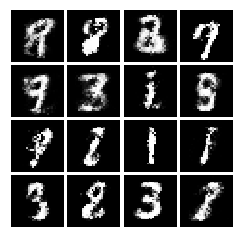

In [26]:
fig